## 🚩 Section 4 : Deep Learning 프로젝트의 목적

1. 내가 설정한 포지션에서 적합한 데이터셋 을 구한 뒤 그에 맞는 가설을 세우고 가설을 검증합니다.
2. 가설 검증을 위한 딥러닝 파이프라인을 구축합니다.
3. 구축한 파이프라인은 완벽하지 않아도 되며, 큰 가설의 일부(곁 가지)에 대한 검증을 목표로 해도 좋습니다.
4. 모자란 부분에 대해서는 이후 프로젝트를 통해서 연계해 나가도 좋으며 이런 부분은 '한계점 및 추후 발전 방향' 등을 통해 제시해 주어도 됩니다.

## 주제 : 의류직물 불량검출을 위한 이미지 분석

### * 환경 세팅

In [2]:
pwd

'C:\\Users\\doiny\\Desktop\\jupyter\\project_S4'

In [3]:
!pip install opencv-python

In [4]:
import cv2
import os
import glob
import shutil
import random
import string
import numpy as np

In [19]:
PATH_DEFECT = 'dataset/Defect_images/'
PATH_MASK = 'dataset/Mask_images/'
PATH_NODEFECT = 'dataset/NODefect_images/'

In [38]:
# 데이터셋 불러오기

random.seed(0)

defect_list = glob.glob(PATH_DEFECT + '*.png')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

# Match defect-mask pairs
'''new_defect_list = list()
new_mask_list = list()
for defect in defect_list:
    num = defect.split('/')[-1].split('_')[0]
    for mask in mask_list:
        num_mask = mask.split('/')[-1].split('_')[0]
        if num == num_mask:
            new_defect_list.append(defect)
            new_mask_list.append(mask)
            break
defect_list = new_defect_list
mask_list = new_mask_list'''

"new_defect_list = list()\nnew_mask_list = list()\nfor defect in defect_list:\n    num = defect.split('/')[-1].split('_')[0]\n    for mask in mask_list:\n        num_mask = mask.split('/')[-1].split('_')[0]\n        if num == num_mask:\n            new_defect_list.append(defect)\n            new_mask_list.append(mask)\n            break\ndefect_list = new_defect_list\nmask_list = new_mask_list"

In [39]:
# 첫 발송 데이터 생성

if os.path.exists('dataset/1') is False:
    os.mkdir('dataset/1')
for file_name in pass_list + defect_list:
    if random.randint(0, 9) < 2:
        barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        shutil.copy2(file_name, 'dataset/1/' + barcode + '.png')

In [40]:
# 두번째 데이터 생성

if os.path.exists('dataset/2') is False:
    os.mkdir('dataset/2')
if os.path.exists('dataset/2/OK') is False:
    os.mkdir('dataset/2/OK')
if os.path.exists('dataset/2/FAIL') is False:
    os.mkdir('dataset/2/FAIL')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 2:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/2/OK/%04d.png' % idx, patch)
            idx += 1 

patch_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]
            if patch_d.sum() > 0:
                patch_list.append(patch)

random.shuffle(patch_list)
patch_list_fraction = patch_list[:len(patch_list)//3]
for idx, patch in enumerate(patch_list_fraction):
    cv2.imwrite('dataset/2/FAIL/%04d.png' % idx, patch)

In [41]:
# 세번째 데이터 생성

if os.path.exists('dataset/3') is False:
    os.mkdir('dataset/3')
if os.path.exists('dataset/3/OK') is False:
    os.mkdir('dataset/3/OK')
if os.path.exists('dataset/3/FAIL') is False:
    os.mkdir('dataset/3/FAIL')
if os.path.exists('dataset/3/MASK') is False:
    os.mkdir('dataset/3/MASK')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 3:
            patch = img[:, w:w+height, :]
            cv2.imwrite('dataset/3/OK/%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('dataset/3/FAIL/%04d.png' % idx, patch)
    cv2.imwrite('dataset/3/MASK/%04d.png' % idx, patch_d)

In [42]:
# 최종 데이터 생성

if os.path.exists('data/input_data') is False:
    os.mkdir('data/input_data')
if os.path.exists('data/output_csv') is False:
    os.mkdir('data/output_csv')
    
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 5:
            patch = img[:, w:w+height, :]
            cv2.imwrite('data/input_data/ok_%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('data/input_data/fail_%04d.png' % idx, patch)

## 1. 모델 설정

In [43]:
import glob
import os
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [44]:
# 하이퍼파라미터

EPOCHS = 10

DATASET_PATH = 'dataset/2/'
DATASET_OK_PATTERN = DATASET_PATH + 'OK/*.png'
DATASET_FAIL_PATTERN = DATASET_PATH + 'FAIL/*.png'

RESULT_SAVE_PATH = 'results/'

In [45]:
# 모델 설정

def Model():
    return Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
                       MaxPool2D(),
                       Conv2D(64, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(128, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(256, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')]) # 이진분류

In [46]:
# 데이터셋 불러오기
 
def preprocess(file_name):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_png(img, channels=1)
    return tf.image.convert_image_dtype(img, tf.float32)

In [48]:
ok_list = glob.glob(DATASET_OK_PATTERN)
ds_ok = tf.data.Dataset.list_files(ok_list)
ds_ok_label = tf.data.Dataset.from_tensor_slices([0] * len(ok_list))
# comprehension -> [0 for _ in range(len(ok_list))] 

ds_ok = ds_ok.map(preprocess)
ds_ok = tf.data.Dataset.zip((ds_ok, ds_ok_label))

fail_list = glob.glob(DATASET_FAIL_PATTERN)
ds_fail = tf.data.Dataset.list_files(fail_list)
ds_fail_label = tf.data.Dataset.from_tensor_slices([1] * len(fail_list))

ds_fail = ds_fail.map(preprocess)
ds_fail = tf.data.Dataset.zip((ds_fail, ds_fail_label))

ds = tf.data.Dataset.concatenate(ds_ok, ds_fail)

ds

<ConcatenateDataset shapes: ((None, None, 1), ()), types: (tf.float32, tf.int32)>

In [49]:
# train, val 데이터셋 나누기

ds_size = len(ok_list) + len(fail_list)
train_size = int(ds_size * 0.7)

ds = ds.shuffle(ds_size) #얼마나 모아서 섞어줄 것인가
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).batch(32)
ds_valid = ds.skip(train_size).batch(32)

In [50]:
# 모델 생성 및 학습

model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(ds_train, validation_data=ds_valid, epochs=EPOCHS)

Epoch 1/10
21/21 [==============================] - 31s 1s/step - loss: 0.4669 - accuracy: 0.8716 - val_loss: 0.4096 - val_accuracy: 0.9085
Epoch 2/10
21/21 [==============================] - 30s 1s/step - loss: 0.3897 - accuracy: 0.8776 - val_loss: 0.3249 - val_accuracy: 0.8908
Epoch 3/10
21/21 [==============================] - 31s 1s/step - loss: 0.3779 - accuracy: 0.8716 - val_loss: 0.3393 - val_accuracy: 0.8908
Epoch 4/10
21/21 [==============================] - 31s 1s/step - loss: 0.3571 - accuracy: 0.8761 - val_loss: 0.3534 - val_accuracy: 0.8838
Epoch 5/10
21/21 [==============================] - 30s 1s/step - loss: 0.3515 - accuracy: 0.8792 - val_loss: 0.4400 - val_accuracy: 0.8451
Epoch 6/10
21/21 [==============================] - 29s 1s/step - loss: 0.3403 - accuracy: 0.8776 - val_loss: 0.3642 - val_accuracy: 0.8803
Epoch 7/10
21/21 [==============================] - 29s 1s/step - loss: 0.3629 - accuracy: 0.8671 - val_loss: 0.3914 - val_accuracy: 0.8662
Epoch 8/10
21/21 [==

In [52]:
# 결과를 이미지로 저장

def mkdir(path):
    if os.path.exists(path) is False: # 있는 경우 오류 발생 확률이 있기 때문에
        os.mkdir(path)

mkdir(RESULT_SAVE_PATH)
mkdir(RESULT_SAVE_PATH + '/TP')
mkdir(RESULT_SAVE_PATH + '/TN')
mkdir(RESULT_SAVE_PATH + '/FP')
mkdir(RESULT_SAVE_PATH + '/FN')

index = 0
for imgs, labels in ds_valid:
    preds = model.predict(imgs)
    for idx in range(imgs.shape[0]):
        gt = labels[idx].numpy()
        y = preds[idx]
        
        if gt == 1 and y > 0.5:
            path = RESULT_SAVE_PATH + '/TP'
        elif gt == 1 and y <= 0.5:
            path = RESULT_SAVE_PATH + '/FN'
        elif gt == 0 and y > 0.5:
            path = RESULT_SAVE_PATH + '/FP'
        else:
            path = RESULT_SAVE_PATH + '/TN'
            
        cv2.imwrite(path + '/%.4f_%04d.png' % (y, index), imgs[idx].numpy() * 255)
        index +=1

## 2. 데이터 정리

In [1]:
# TFRecord Builder

import glob
import os
import tensorflow as tf
import cv2

In [2]:
# 경로 및 하이퍼파라미터
# 일부분만 작업 가능

DATASET_OK_PATTERN = 'dataset/3/OK/*.png'
DATASET_FAIL_PATTERN = 'dataset/3/FAIL/*.png'

TFRECORD_PATH = 'tfrecords/'
IMAGE_PER_TFRECORD = 100

In [3]:
# import data

ok_list = glob.glob(DATASET_OK_PATTERN)
fail_list = glob.glob(DATASET_FAIL_PATTERN)

num_ok = len(ok_list)
num_fail = len(fail_list)

# Oversampling # 이진분류 밸런스를 위해
fail_list_new = list()
for _ in range(num_ok // num_fail):
    fail_list_new += fail_list
fail_list_new += fail_list[: num_ok % num_fail]
fail_list = fail_list_new

ok_label = [0] * len(ok_list)
fail_label = [1] * len(fail_list)

file_list = ok_list + fail_list
label_list = ok_label + fail_label

In [4]:
# TFRecord functions
# 이미지와 레이블

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
    image_shape = tf.image.decode_image(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

In [5]:
# TFRecords 작성

if os.path.exists(TFRECORD_PATH) is False:
    os.mkdir(TFRECORD_PATH)

num_tfrecords = len(file_list) // IMAGE_PER_TFRECORD
if len(file_list) % IMAGE_PER_TFRECORD != 0:
    num_tfrecords += 1

for idx in range(num_tfrecords):
    idx0 = idx * IMAGE_PER_TFRECORD
    idx1 = idx0 + IMAGE_PER_TFRECORD
    record_file = TFRECORD_PATH + '%05d.tfrecords' % idx
    with tf.io.TFRecordWriter(record_file) as writer:
        for filename, label in zip(file_list[idx0:idx1],
                                   label_list[idx0:idx1]):
            image_string = open(filename, 'rb').read()
            tf_example = image_example(image_string, label)
            writer.write(tf_example.SerializeToString())

## 3. 모델 학습 및 검증

In [7]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [8]:
# 모델 학습

import glob
import os
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Concatenate, Flatten, Dense

In [17]:
# 하이퍼파라미터

EPOCHS = 100
RESULT_SAVE_PATH = 'results/'

In [10]:
# Inception-based 모델 정의

def Model():
    def inception(filters):
        def subnetwork(x):
            h1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
            h1 = MaxPool2D()(h1)
            
            # bottleneck layer - 적은 파라미터를 이용해 동일한 receptivefield 확보 가능
            h2 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(h2)
            h2 = MaxPool2D()(h2)
            
            h3 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(h3)
            h3 = MaxPool2D()(h3)
            return Concatenate()([h1, h2, h3])
        return subnetwork
    
    x = tf.keras.Input(shape=(256, 256, 3))
    h = inception(16)(x)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = Flatten()(h)
    h = Dense(1024, activation='relu')(h)
    y = Dense(1, activation='sigmoid')(h)
    return tf.keras.Model(inputs=x, outputs=y)

In [11]:
# 데이터 전처리 함수 정의

def preprocess(img):
    return tf.image.convert_image_dtype(img, tf.float32)

In [12]:
# 데이터 Augmentation 함수 정의 
# train set에만 이용 
# label과 맵핑 전 정의
# 여러 에폭에 다양한 경우의 수를 훈련 가능

def augmentation(img, label):
    def flip(x):
        x = tf.image.random_flip_left_right(x) # 25% / 25%
        x = tf.image.random_flip_up_down(x) # 25% / 25%
        return x
    
    def rotate(x):
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                   lambda: tfa.image.rotate(x,
                                       tf.random.uniform(shape=[], minval=0.0, maxval=360.0, dtype=tf.float32),
                                       interpolation='BILINEAR'),
                   lambda: x) # 50% 확률로 랜덤하게 출력
        return x
    
    def translation(x):
        dx = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        dy = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                    lambda: tfa.image.transform(x,
                                                [0, 0, dx, 0, 0, dy, 0, 0], # x, y, translation
                                                interpolation='BILINEAR'),
                    lambda: x) # 50% 확률로 랜덤하게 출력
        return x
    
    img = flip(img)
    img = rotate(img)
    img = translation(img)
           
    return img, label

In [13]:
# TFRecords 불러오기

tffiles = glob.glob('tfrecords/*')
raw_image_dataset = tf.data.TFRecordDataset(tffiles) # 데이터셋 생성

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def _parse_image_label(parsed_dataset):
    return preprocess(tf.image.decode_png(parsed_dataset['image_raw'])), parsed_dataset['label']

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
dataset = parsed_image_dataset.map(_parse_image_label)

In [14]:
# 데이터셋 나누기

ds_size = 0
for _ in dataset:
    ds_size += 1

train_size = int(ds_size * 0.7)

ds = dataset.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).prefetch(1024).batch(32).map(augmentation)
ds_valid = ds.skip(train_size).prefetch(1024).batch(32)

In [15]:
# 모델 생성

model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
# 모델 학습하기

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=EPOCHS,
                    callbacks=[earlystopping])

Epoch 1/100
55/55 [==============================] - 361s 7s/step - loss: 0.6445 - accuracy: 0.5732 - val_loss: 0.4792 - val_accuracy: 0.7644
Epoch 2/100
55/55 [==============================] - 373s 7s/step - loss: 0.6021 - accuracy: 0.5807 - val_loss: 0.4634 - val_accuracy: 0.7684
Epoch 3/100
55/55 [==============================] - 372s 7s/step - loss: 0.5860 - accuracy: 0.6312 - val_loss: 0.5024 - val_accuracy: 0.7403
Epoch 4/100
55/55 [==============================] - 380s 7s/step - loss: 0.6046 - accuracy: 0.5945 - val_loss: 0.4917 - val_accuracy: 0.7443
Epoch 5/100
55/55 [==============================] - 381s 7s/step - loss: 0.6066 - accuracy: 0.6111 - val_loss: 0.4169 - val_accuracy: 0.8046
Epoch 6/100
55/55 [==============================] - 383s 7s/step - loss: 0.5857 - accuracy: 0.6554 - val_loss: 0.4293 - val_accuracy: 0.7564
Epoch 7/100
55/55 [==============================] - 383s 7s/step - loss: 0.6011 - accuracy: 0.6031 - val_loss: 0.4608 - val_accuracy: 0.7684
Epoch 

55/55 [==============================] - 468s 8s/step - loss: 0.5693 - accuracy: 0.6284 - val_loss: 0.3760 - val_accuracy: 0.8046
Epoch 59/100
55/55 [==============================] - 473s 8s/step - loss: 0.5601 - accuracy: 0.6307 - val_loss: 0.4108 - val_accuracy: 0.8005
Epoch 60/100
55/55 [==============================] - 468s 8s/step - loss: 0.5226 - accuracy: 0.6778 - val_loss: 0.3723 - val_accuracy: 0.8340
Epoch 61/100
55/55 [==============================] - 532s 10s/step - loss: 0.5668 - accuracy: 0.6519 - val_loss: 0.4340 - val_accuracy: 0.7818
Epoch 62/100
55/55 [==============================] - 528s 9s/step - loss: 0.5915 - accuracy: 0.5979 - val_loss: 0.4051 - val_accuracy: 0.8099
Epoch 63/100
55/55 [==============================] - 549s 10s/step - loss: 0.5572 - accuracy: 0.6542 - val_loss: 0.3882 - val_accuracy: 0.8139
Epoch 64/100
55/55 [==============================] - 447s 8s/step - loss: 0.5719 - accuracy: 0.6238 - val_loss: 0.3720 - val_accuracy: 0.8380
Epoch 65/1

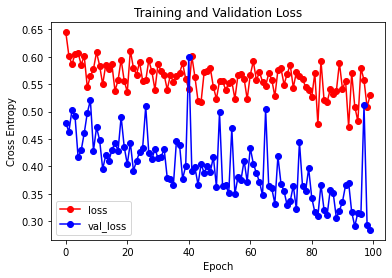

In [24]:
# 학습 결과 출력

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label='loss')
plt.plot(val_loss, 'bo-', label='val_loss')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save('model/inception_model.h5')

In [26]:
pip freeze > Requirements.txt

Note: you may need to restart the kernel to use updated packages.
